## Extract

In [88]:
import os
import requests
import json
import pandas as pd
import os
from dotenv import load_dotenv

load_dotenv()

api_key = os.getenv('api_key')

URL = 'https://v1.formula-1.api-sports.io/teams'

# Correct way: API key goes in headers
headers = {
    'X-RapidAPI-Key': api_key,
    'X-RapidAPI-Host': 'v1.formula-1.api-sports.io'
}

response = requests.get(URL, headers=headers)

# Check the response status
if response.status_code == 200:
    team_data = response.json()
    print(json.dumps(team_data, indent=4))
else:
    print(f"Error: {response.status_code} - {response.text}")


{
    "get": "teams",
    "parameters": [],
    "errors": [],
    "results": 18,
    "response": [
        {
            "id": 1,
            "name": "Red Bull Racing",
            "logo": "https://media.api-sports.io/formula-1/teams/1.png",
            "base": "Milton Keynes, United Kingdom",
            "first_team_entry": 1997,
            "world_championships": 6,
            "highest_race_finish": {
                "position": 1,
                "number": 125
            },
            "pole_positions": 108,
            "fastest_laps": 100,
            "president": "Dietrich Mateschitz",
            "director": "Laurent Mekies",
            "technical_manager": "Pierre Wach\u00e9",
            "chassis": "RB21",
            "engine": "Honda RBPT",
            "tyres": "Pirelli"
        },
        {
            "id": 2,
            "name": "McLaren Racing",
            "logo": "https://media.api-sports.io/formula-1/teams/2.png",
            "base": "Woking, United Kingdom",
       

In [89]:
print(json.dumps(team_data, indent=4))

{
    "get": "teams",
    "parameters": [],
    "errors": [],
    "results": 18,
    "response": [
        {
            "id": 1,
            "name": "Red Bull Racing",
            "logo": "https://media.api-sports.io/formula-1/teams/1.png",
            "base": "Milton Keynes, United Kingdom",
            "first_team_entry": 1997,
            "world_championships": 6,
            "highest_race_finish": {
                "position": 1,
                "number": 125
            },
            "pole_positions": 108,
            "fastest_laps": 100,
            "president": "Dietrich Mateschitz",
            "director": "Laurent Mekies",
            "technical_manager": "Pierre Wach\u00e9",
            "chassis": "RB21",
            "engine": "Honda RBPT",
            "tyres": "Pirelli"
        },
        {
            "id": 2,
            "name": "McLaren Racing",
            "logo": "https://media.api-sports.io/formula-1/teams/2.png",
            "base": "Woking, United Kingdom",
       

## TRANSFORM

In [90]:
data_team = team_data['response']
print(json.dumps(data_team, indent=4))

[
    {
        "id": 1,
        "name": "Red Bull Racing",
        "logo": "https://media.api-sports.io/formula-1/teams/1.png",
        "base": "Milton Keynes, United Kingdom",
        "first_team_entry": 1997,
        "world_championships": 6,
        "highest_race_finish": {
            "position": 1,
            "number": 125
        },
        "pole_positions": 108,
        "fastest_laps": 100,
        "president": "Dietrich Mateschitz",
        "director": "Laurent Mekies",
        "technical_manager": "Pierre Wach\u00e9",
        "chassis": "RB21",
        "engine": "Honda RBPT",
        "tyres": "Pirelli"
    },
    {
        "id": 2,
        "name": "McLaren Racing",
        "logo": "https://media.api-sports.io/formula-1/teams/2.png",
        "base": "Woking, United Kingdom",
        "first_team_entry": 1966,
        "world_championships": 9,
        "highest_race_finish": {
            "position": 1,
            "number": 201
        },
        "pole_positions": 173,
        

In [91]:
rows = []

column_names = ['id','name','location','first_entry','Highest_accolades', 'Fastest_lap_time','times_achieved', 'president','director', 'chassis','engine','tyres']

for team in data_team:
    id = team['id']
    name = team['name']
    location = team['base']
    first_entry = team['first_team_entry']
    Highest_accolades = team["world_championships"]
    fastest_lap_time = team["highest_race_finish"]["position"]
    times_achieved = team["highest_race_finish"]["number"]
    president = team["president"]
    director = team["director"]
    chassis = team["chassis"]
    engine = team["engine"]
    tyres = team["tyres"]

    tuple_teams = (id,name,location,first_entry,Highest_accolades,fastest_lap_time,times_achieved,president,director,chassis,engine,tyres)

    rows.append(tuple_teams)

print(json.dumps(rows, indent=4))





[
    [
        1,
        "Red Bull Racing",
        "Milton Keynes, United Kingdom",
        1997,
        6,
        1,
        125,
        "Dietrich Mateschitz",
        "Laurent Mekies",
        "RB21",
        "Honda RBPT",
        "Pirelli"
    ],
    [
        2,
        "McLaren Racing",
        "Woking, United Kingdom",
        1966,
        9,
        1,
        201,
        "Zak Brown",
        "Andrea Stella",
        "MCL39",
        "Mercedes",
        "Pirelli"
    ],
    [
        3,
        "Scuderia Ferrari",
        "Maranello, Italy",
        1950,
        16,
        1,
        249,
        "John Elkann",
        "Fr\u00e9d\u00e9ric Vasseur",
        "SF-25",
        "Ferrari",
        "Pirelli"
    ],
    [
        4,
        "Force India",
        null,
        null,
        null,
        null,
        null,
        "Subrata Roy, Vijay Mallya",
        "Robert Fernley",
        null,
        "Ferrari V8, Mercedes V8, Mercedes V6 turbo",
        "Bridgestone, Pi

In [92]:
from tabulate import tabulate

df = pd.DataFrame(rows,columns = column_names)
df.head()

id                   name                       location  first_entry  \
0   1        Red Bull Racing  Milton Keynes, United Kingdom       1997.0   
1   2         McLaren Racing         Woking, United Kingdom       1966.0   
2   3       Scuderia Ferrari               Maranello, Italy       1950.0   
3   4            Force India                           None          NaN   
4   5  Mercedes-AMG Petronas       Brackley, United Kingdom       1970.0   

   Highest_accolades  Fastest_lap_time  times_achieved  \
0                6.0               1.0           125.0   
1                9.0               1.0           201.0   
2               16.0               1.0           249.0   
3                NaN               NaN             NaN   
4                8.0               1.0           121.0   

                   president          director chassis  \
0        Dietrich Mateschitz    Laurent Mekies    RB21   
1                  Zak Brown     Andrea Stella   MCL39   
2                John Elkann  Frédéric Vasseur   SF-25   
3  Subrata Roy, Vijay Mallya    Robert Fernley    None   
4             Markus Schäfer        Toto Wolff     W16   

                                       engine                 tyres  
0                                  Honda RBPT               Pirelli  
1                                    Mercedes               Pirelli  
2                                     Ferrari               Pirelli  
3  Ferrari V8, Mercedes V8, Mercedes V6 turbo  Bridgestone, Pirelli  
4                                    Mercedes               Pirelli

In [93]:
df.dtypes

id                     int64
name                  object
location              object
first_entry          float64
Highest_accolades    float64
Fastest_lap_time     float64
times_achieved       float64
president             object
director              object
chassis               object
engine                object
tyres                 object
dtype: object

In [94]:
print(df.isnull().sum())

id                   0
name                 0
location             8
first_entry          8
Highest_accolades    8
Fastest_lap_time     8
times_achieved       8
president            0
director             0
chassis              8
engine               0
tyres                0
dtype: int64


In [95]:
print(df.describe())

              id  first_entry  Highest_accolades  Fastest_lap_time  \
count  18.000000      10.0000          10.000000         10.000000   
mean    9.500000    1985.9000           5.000000          1.300000   
std     5.338539      21.3721           5.497474          0.948683   
min     1.000000    1950.0000           0.000000          1.000000   
25%     5.250000    1972.0000           0.000000          1.000000   
50%     9.500000    1985.5000           4.000000          1.000000   
75%    13.750000    1996.0000           8.750000          1.000000   
max    18.000000    2018.0000          16.000000          4.000000   

       times_achieved  
count       10.000000  
mean        83.600000  
std         92.028015  
min          1.000000  
25%          1.250000  
50%         67.500000  
75%        124.000000  
max        249.000000  


In [96]:
df['location'] = df['location'].fillna('unknown')
df['first_entry'] = df['first_entry'].fillna(0)
df['Highest_accolades'] = df['Highest_accolades'].fillna(0)
df['Fastest_lap_time'] = df['Fastest_lap_time'].fillna(0)
df['times_achieved'] = df['times_achieved'].fillna(0)
df['chassis'] = df['chassis'].fillna('unknown')



In [97]:
missing_per_column = df.isnull().sum()
print(missing_per_column)


id                   0
name                 0
location             0
first_entry          0
Highest_accolades    0
Fastest_lap_time     0
times_achieved       0
president            0
director             0
chassis              0
engine               0
tyres                0
dtype: int64


In [98]:
# 1. Remove leading/trailing spaces
df.columns = df.columns.str.strip()

# 2. Convert to lowercase
df.columns = df.columns.str.lower()

# 3. Replace spaces with underscores
df.columns = df.columns.str.replace(' ', '_')

# 4. Remove special characters
df.columns = df.columns.str.replace(r'[^\w_]', '', regex=True)


In [99]:
df.head()

id                   name                       location  first_entry  \
0   1        Red Bull Racing  Milton Keynes, United Kingdom       1997.0   
1   2         McLaren Racing         Woking, United Kingdom       1966.0   
2   3       Scuderia Ferrari               Maranello, Italy       1950.0   
3   4            Force India                        unknown          0.0   
4   5  Mercedes-AMG Petronas       Brackley, United Kingdom       1970.0   

   highest_accolades  fastest_lap_time  times_achieved  \
0                6.0               1.0           125.0   
1                9.0               1.0           201.0   
2               16.0               1.0           249.0   
3                0.0               0.0             0.0   
4                8.0               1.0           121.0   

                   president          director  chassis  \
0        Dietrich Mateschitz    Laurent Mekies     RB21   
1                  Zak Brown     Andrea Stella    MCL39   
2                John Elkann  Frédéric Vasseur    SF-25   
3  Subrata Roy, Vijay Mallya    Robert Fernley  unknown   
4             Markus Schäfer        Toto Wolff      W16   

                                       engine                 tyres  
0                                  Honda RBPT               Pirelli  
1                                    Mercedes               Pirelli  
2                                     Ferrari               Pirelli  
3  Ferrari V8, Mercedes V8, Mercedes V6 turbo  Bridgestone, Pirelli  
4                                    Mercedes               Pirelli

In [100]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 18 non-null     int64  
 1   name               18 non-null     object 
 2   location           18 non-null     object 
 3   first_entry        18 non-null     float64
 4   highest_accolades  18 non-null     float64
 5   fastest_lap_time   18 non-null     float64
 6   times_achieved     18 non-null     float64
 7   president          18 non-null     object 
 8   director           18 non-null     object 
 9   chassis            18 non-null     object 
 10  engine             18 non-null     object 
 11  tyres              18 non-null     object 
dtypes: float64(4), int64(1), object(7)
memory usage: 1.8+ KB


In [101]:
# convert floats into interger for consistency
# Fill NaN with 0 (or another default value)
df['first_entry'] = df['first_entry'].fillna(0).astype(int)
df['highest_accolades'] = df['highest_accolades'].fillna(0).astype(int)

df['fastest_lap_time'] = df['fastest_lap_time'].fillna(0).astype(int)
df['times_achieved'] = df['times_achieved'].fillna(0).astype(int)



In [102]:
#stripping for consistency to change object to string
text_cols = ['name', 'location', 'president', 'director', 'chassis', 'engine', 'tyres']
for col in text_cols:
    df[col] = df[col].str.strip()  # remove leading/trailing spaces


In [103]:
#To keep consisent sting formats
df['name'] = df['name'].str.upper()
df['location'] = df['location'].str.title()
df['chassis'] = df['chassis'].str.title()
df['tyres'] = df['tyres'].str.title()


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 18 non-null     int64 
 1   name               18 non-null     object
 2   location           18 non-null     object
 3   first_entry        18 non-null     int64 
 4   highest_accolades  18 non-null     int64 
 5   fastest_lap_time   18 non-null     int64 
 6   times_achieved     18 non-null     int64 
 7   president          18 non-null     object
 8   director           18 non-null     object
 9   chassis            18 non-null     object
 10  engine             18 non-null     object
 11  tyres              18 non-null     object
dtypes: int64(5), object(7)
memory usage: 1.8+ KB


In [105]:
print(df.columns.tolist())



['id', 'name', 'location', 'first_entry', 'highest_accolades', 'fastest_lap_time', 'times_achieved', 'president', 'director', 'chassis', 'engine', 'tyres']


In [106]:
df.value_counts(dropna=False)

id  name                       location                       first_entry  highest_accolades  fastest_lap_time  times_achieved  president                                                          director                                                                         chassis   engine                                      tyres               
1   RED BULL RACING            Milton Keynes, United Kingdom  1997         6                  1                 125             Dietrich Mateschitz                                                Laurent Mekies                                                                   Rb21      Honda RBPT                                  Pirelli                 1
2   MCLAREN RACING             Woking, United Kingdom         1966         9                  1                 201             Zak Brown                                                          Andrea Stella                                                                    Mcl39     Mercede

In [107]:
# cleaned the unknown null values within location and chassis

missing_col = ['location', 'chassis',]

for col in missing_col:
    df[col] = df[col].fillna('unknown')

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 18 non-null     int64 
 1   name               18 non-null     object
 2   location           18 non-null     object
 3   first_entry        18 non-null     int64 
 4   highest_accolades  18 non-null     int64 
 5   fastest_lap_time   18 non-null     int64 
 6   times_achieved     18 non-null     int64 
 7   president          18 non-null     object
 8   director           18 non-null     object
 9   chassis            18 non-null     object
 10  engine             18 non-null     object
 11  tyres              18 non-null     object
dtypes: int64(5), object(7)
memory usage: 1.8+ KB


In [109]:
df['name'] = df['name'].str.upper()       # All uppercase for consistency in names
df['location'] = df['location'].str.title()  # Proper capitalization for locations
df['chassis'] = df['chassis'].str.title()    # Proper capitalization for chassis names
df['tyres'] = df['tyres'].str.title()        # Proper capitalization for tyre brands


In [110]:
df.head()


id                   name                       location  first_entry  \
0   1        RED BULL RACING  Milton Keynes, United Kingdom         1997   
1   2         MCLAREN RACING         Woking, United Kingdom         1966   
2   3       SCUDERIA FERRARI               Maranello, Italy         1950   
3   4            FORCE INDIA                        Unknown            0   
4   5  MERCEDES-AMG PETRONAS       Brackley, United Kingdom         1970   

   highest_accolades  fastest_lap_time  times_achieved  \
0                  6                 1             125   
1                  9                 1             201   
2                 16                 1             249   
3                  0                 0               0   
4                  8                 1             121   

                   president          director  chassis  \
0        Dietrich Mateschitz    Laurent Mekies     Rb21   
1                  Zak Brown     Andrea Stella    Mcl39   
2                John Elkann  Frédéric Vasseur    Sf-25   
3  Subrata Roy, Vijay Mallya    Robert Fernley  Unknown   
4             Markus Schäfer        Toto Wolff      W16   

                                       engine                 tyres  
0                                  Honda RBPT               Pirelli  
1                                    Mercedes               Pirelli  
2                                     Ferrari               Pirelli  
3  Ferrari V8, Mercedes V8, Mercedes V6 turbo  Bridgestone, Pirelli  
4                                    Mercedes               Pirelli

## LOAD

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 18 non-null     int64 
 1   name               18 non-null     object
 2   location           18 non-null     object
 3   first_entry        18 non-null     int64 
 4   highest_accolades  18 non-null     int64 
 5   fastest_lap_time   18 non-null     int64 
 6   times_achieved     18 non-null     int64 
 7   president          18 non-null     object
 8   director           18 non-null     object
 9   chassis            18 non-null     object
 10  engine             18 non-null     object
 11  tyres              18 non-null     object
dtypes: int64(5), object(7)
memory usage: 1.8+ KB


In [112]:
from sqlalchemy import create_engine, inspect, text

engine = create_engine('sqlite:///f1_teams.db')

create_table_query = """
    CREATE TABLE IF NOT EXISTS f1_teams (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT,
    location TEXT,
    first_entry INTEGER,
    Highest_accolades INTEGER,
    fastest_lap_time INTEGER,
    times_achieved INTEGER,
    president TEXT,
    director TEXT,
    chassis TEXT,
    tyres TEXT
);

 """

In [113]:

df.to_sql('f1_teams', con=engine, if_exists='replace', index=False)

18

In [114]:
query = 'SELECT * FROM f1_teams ORDER BY times_achieved DESC;'

df_read_sql = pd.read_sql(query, con=engine)
print(df_read_sql)

    id                       name                       location  first_entry  \
0    3           SCUDERIA FERRARI               Maranello, Italy         1950   
1    2             MCLAREN RACING         Woking, United Kingdom         1966   
2    1            RED BULL RACING  Milton Keynes, United Kingdom         1997   
3    5      MERCEDES-AMG PETRONAS       Brackley, United Kingdom         1970   
4   12           WILLIAMS F1 TEAM          Grove, United Kingdom         1978   
5   13             ALPINE F1 TEAM        Enstone, United Kingdom         1986   
6    7               RACING BULLS                  Faenza, Italy         1985   
7   14               HAAS F1 TEAM      Kannapolis, United States         2016   
8   17       ASTON MARTIN F1 TEAM    Silverstone, United Kingdom         2018   
9   18  STAKE F1 TEAM KICK SAUBER            Hinwil, Switzerland         1993   
10   4                FORCE INDIA                        Unknown            0   
11   6              LOTUS F1

In [115]:
# Save DataFrame to CSV
df.to_csv('f1_teams_cleaned.csv', index=False)

print("DataFrame saved to 'f1_teams_cleaned.csv'")


DataFrame saved to 'f1_teams_cleaned.csv'


## Visualize

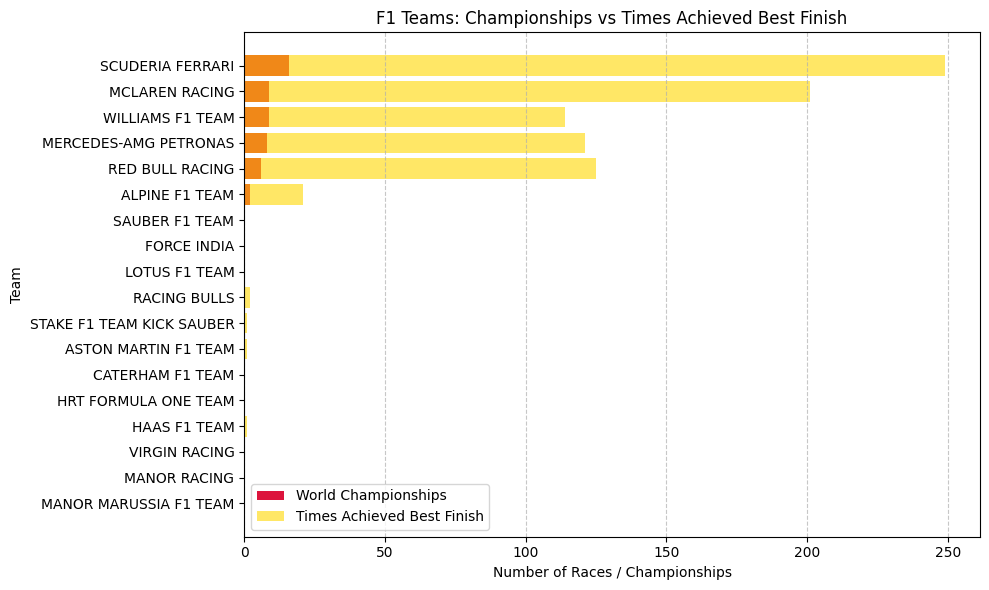

In [117]:
import matplotlib.pyplot as plt

# Sort teams by highest accolades for better visualization
df_sorted = df.sort_values(by='highest_accolades', ascending=True)

# Create horizontal bar chart
plt.figure(figsize=(10,6))
plt.barh(df_sorted['name'], df_sorted['highest_accolades'], color='crimson', label='World Championships')
plt.barh(df_sorted['name'], df_sorted['times_achieved'], color='gold', alpha=0.6, label='Times Achieved Best Finish')

# Add labels and title
plt.xlabel('Number of Races / Championships')
plt.ylabel('Team')
plt.title('F1 Teams: Championships vs Times Achieved Best Finish')
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()


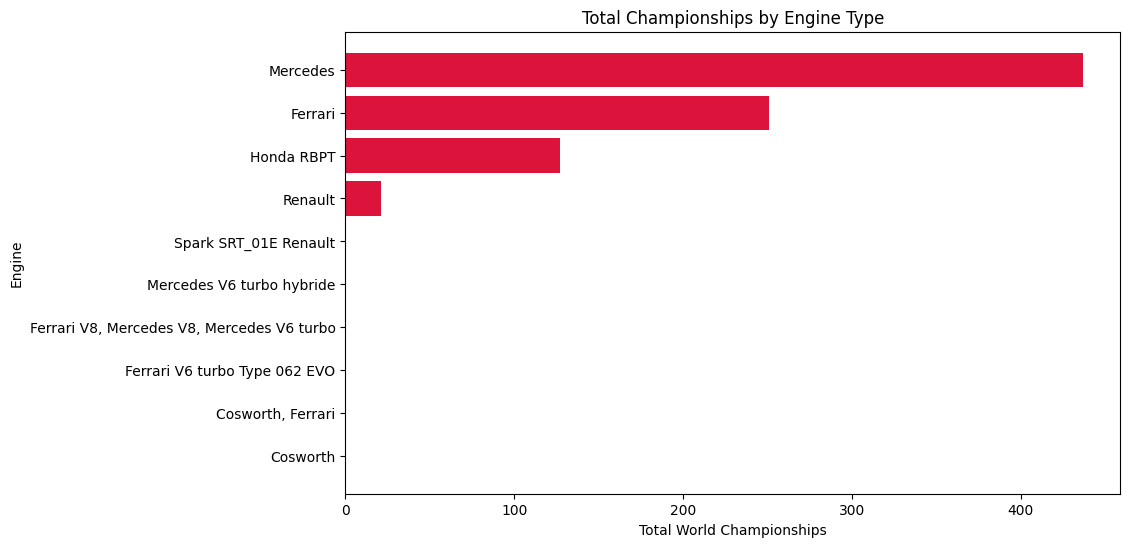

In [82]:
engine_stats = df.groupby('engine')['times_achieved'].sum().sort_values()

plt.figure(figsize=(10,6))
plt.barh(engine_stats.index, engine_stats.values, color='crimson')
plt.xlabel('Total World Championships')
plt.ylabel('Engine')
plt.title('Total Championships by Engine Type')
plt.show()



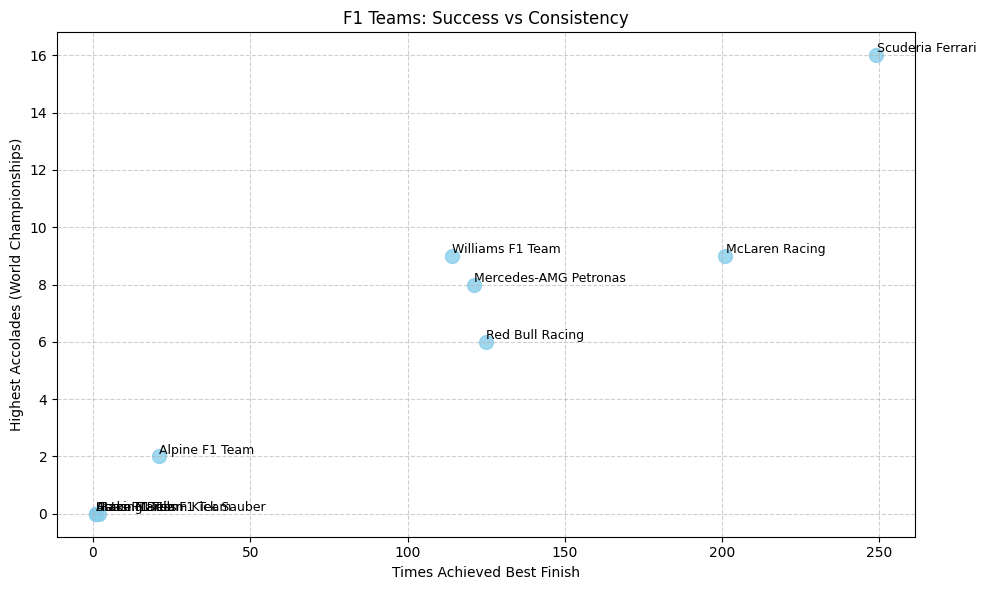

In [87]:
plt.figure(figsize=(10,6))

# Scatter plot: x = times_achieved, y = Highest_accolades
plt.scatter(df['times_achieved'], df['Highest_accolades'], color='skyblue', s=100, alpha=0.8)

# Add team names as labels
for i, row in df.iterrows():
    plt.text(row['times_achieved']+0.1, row['Highest_accolades']+0.1, row['name'], fontsize=9)

# Labels and title
plt.xlabel('Times Achieved Best Finish')
plt.ylabel('Highest Accolades (World Championships)')
plt.title('F1 Teams: Success vs Consistency')

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
